<a href="https://colab.research.google.com/github/NikolayLenkovNikolaev/Bayes_theory_models/blob/main/Backgroud_Markiv_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background: Markov Chains

Definition: if we have a sequence of random variables $X_1,X_2...X_n$ where the indices 1,2,...n represent successive points in time, we can use the chain rule of probability to calculate the probability of the entire seqeunce:

$$p(X_1,...X_n)= p(X_1)p(X_2|X_1).p(X_3|X_2,X_2)...p(X_n|X_{n-1},X_{m-2}....X_2,X_1)$$

Markov Chains simplify this expression by using the Markov assumption. The assumption is that given the entire past history, the probability distribution for the random variable at next time step only depends on the current variable. Mathematically, the assumption is written like this:

$$p(X_{t+1}|X_{t}, X_{t-1}... X_2,X_1)= p(X_{t+1}|X_t)$$

For all t=2...n. Under this assumption , we can write the first expression as:

$$p(X_1,X_2...X_n)= p(X_1).p(X_2|X_1).p(X_3|X_2).p(X_4|X_3)...p(X_n|X_{n-1})$$

Which is much simpler than the original. It consists of an intitial distribution for the first variable, $p(X_1)$ and $n-1$ transition probabilities. We usually make one more asumption: that the transition probabilities do not change with time. Hence, the transition from time t to time t+1 depends only on the value of $X_t$

## Examples of Markov Chains:

## Discrete Markov Chain:

Suppose you have a secret number (make it an integer) between 1 and 5. We will call it your initial number at step 1. Now for each step, our secret number will change according to the following rules:
1. flip a coin:
2.
- if the coin turns up heads, then increae your secret number by oine(5 increses to 1)  
- if the coin turns up tails, then decrease your secret nuber by one (1 decreases to 5)
3. Repeat n times, and record the evolving history of your secret number

Befoe the experiment, we can think of the sequence of secret numbers as asequence of random variables, each taking on a value in [1,2,3,4,5]. Assume that the coin is fair, so that with each flip, the probability of heads and tails are both 0.5.

Does this game qualify as a true Markov chain? Suppose your secret number is currently 4 and that the history of your secret numbers is (2,1,2,3)
. What is the probability that on the next step, your secret number will be 5? What about the other four possibilities? Because of the rules of this game, the probability of the next transition will depend only on the fact that your current number is 4. The numbers further back in your history are irrelevant, so this is a Markov chain.

This is an example of a discrete Markov chain, where the possible values of the random variables come from a discrete set. Those possible values (secret numbers in this example) are called states of the chain. The states are usually numbers, as in this example, but they can represent anything. In one common example, the states describe the weather on a particular day, which could be labeled as 1-fair, 2-poor.


## Random Walk (continuous)

Now let's look at a continuous example of a Markov chain. Say $X_t=0$ and we have the following transition model.

$$p(X_{t+1}|X_t=x_t)= N(x_t, 1)$$

Thai si, the probability distribution for the next state is Normal with variance 1 and mean equal to the current state. This is often referred t as a "random walk". Clearly, it is a Markov chain because the transition to the next state $X_{t+1}$ only depends on the current state $X_t$.



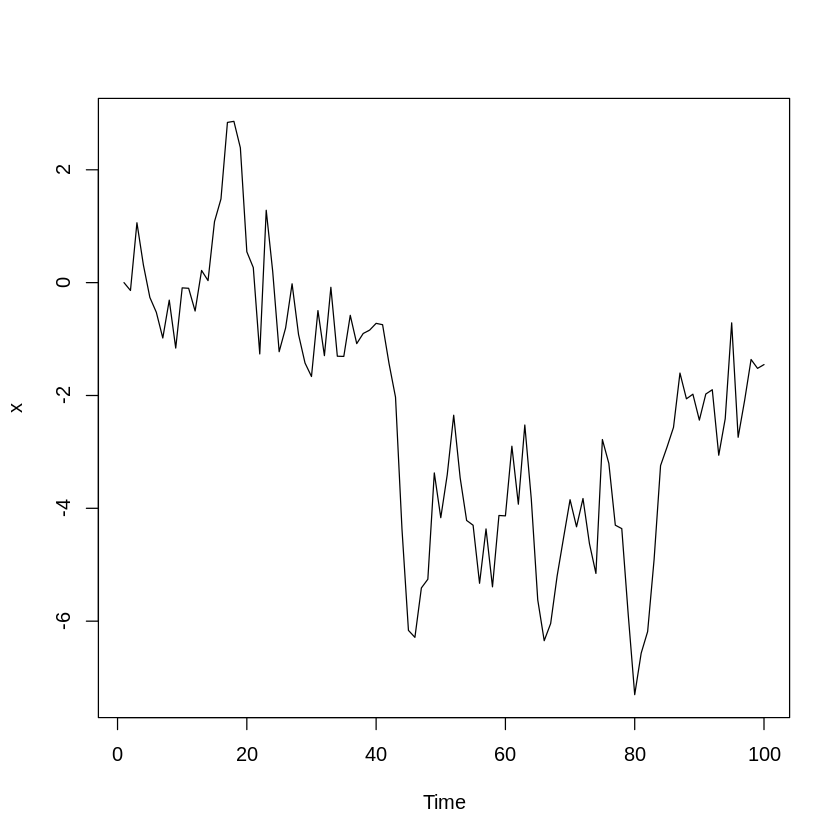

In [6]:
set.seed(34)

n = 100
x = numeric(n)

for (i in 2:n) {
  x[i] = rnorm(1, mean=x[i-1], sd=1.0)
}

plot.ts(x)

In [7]:
x

[1]  0.00000000 -0.13888997  1.06092293  0.31320052 -0.26204765 -0.52562917
  [7] -0.98112132 -0.31050127 -1.15951589 -0.09271139 -0.10017192 -0.50305201
 [13]  0.21605593  0.03599727  1.08218803  1.48344296  2.83983300  2.85905964
 [19]  2.38964180  0.54697991  0.26723897 -1.26353064  1.28262343  0.20069266
 [25] -1.22390514 -0.80226176 -0.02089366 -0.92034144 -1.42421067 -1.66358460
 [31] -0.49558467 -1.29372332 -0.08276410 -1.30422028 -1.30764137 -0.57942305
 [37] -1.08075706 -0.90131966 -0.84115361 -0.72159907 -0.74545025 -1.43575998
 [43] -2.03027547 -4.36949318 -6.16365586 -6.28709257 -5.41140074 -5.25691277
 [49] -3.37301812 -4.16614334 -3.40582571 -2.35024727 -3.45943894 -4.21548228
 [55] -4.29960651 -5.32854141 -4.36585589 -5.39160077 -4.12715713 -4.13381538
 [61] -2.89970065 -3.92695167 -2.52390631 -3.83305025 -5.62184923 -6.34630554
 [67] -6.04146891 -5.19925852 -4.51836559 -3.84789776 -4.32747298 -3.82660076
 [73] -4.62674172 -5.15397927 -2.78116385 -3.20446273 -4.29905904 -4.36002878
 [79] -5.88783814 -7.30303021 -6.56822579 -6.18461833 -4.90700890 -3.24266176
 [85] -2.91459158 -2.56567187 -1.60299877 -2.05907582 -1.97746998 -2.43643480
 [91] -1.97405939 -1.89835078 -3.05882446 -2.41281935 -0.71306384 -2.74067109
 [97] -2.08976596 -1.36203202 -1.51939660 -1.45258833

## Transition Matrix:

Let’s return to our example of the discrete Markov chain. If we assume that transition probabilities do not change with time, then there are a total of $25 (5^2)$
 potential transition probabilities. Potential transition probabilities would be from State 1 to State 2, State 1 to State 3, and so forth. These transition probabilities can be arranged into a matrix Q
:

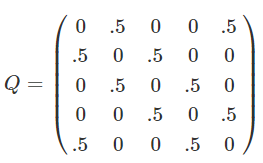

where the transitions from State 1 are in the first row, the transitions from State 2 are in the second row, etc. For example, the probability $p(X_{t+1}=5|X_t=4)$ can be found in the fourth row, fifithe column.

The transition matrix is especially useful if we want to find the probabilities associated with multiple steps of the chain. For example, we might want to know  $p(X_{t+2}=3|X_t)$ , the probability of your secret number being 3 two steps from now, given that your number is currently 1. We can calculate this as $\sum_{k=1}^5 p(X_{t+2}=3 |X_{t+1=k}).p(X_{t+1=k}|X_t=1)$,  which conveniently is found in the first row and third column of $Q^2$

In [10]:
Q = matrix(c(0.0, 0.5, 0.0, 0.0, 0.5,
             0.5, 0.0, 0.5, 0.0, 0.0,
             0.0, 0.5, 0.0, 0.5, 0.0,
             0.0, 0.0, 0.5, 0.0, 0.5,
             0.5, 0.0, 0.0, 0.5, 0.0),
           nrow=5, byrow=TRUE)

Q %*% Q # Matrix multiplication in R. This is Q^2.

0.50,0.00,0.25,0.25,0.00
0.00,0.50,0.00,0.25,0.25
0.25,0.00,0.50,0.00,0.25
0.25,0.25,0.00,0.50,0.00
0.00,0.25,0.25,0.00,0.50


In [11]:
(Q %*% Q)[1,3]

[1] 0.25

Therefore, if your secret number is currently 1, the probability that the number will be 3 two steps from now is .25.

## Stationary distribution
Suppose we want to know the probability distribution of the your secret number in the distant future, say   $p(X_{t+h} |X_t)$ where h is a large number. Let's calculate tis for a feq different values of h

In [12]:
Q5 = Q %*% Q %*% Q %*% Q %*% Q # h=5 steps in the future
round(Q5, 3)

0.062,0.312,0.156,0.156,0.312
0.312,0.062,0.312,0.156,0.156
0.156,0.312,0.062,0.312,0.156
0.156,0.156,0.312,0.062,0.312
0.312,0.156,0.156,0.312,0.062


In [13]:
Q10 = Q %*% Q %*% Q %*% Q %*% Q %*% Q %*% Q %*% Q %*% Q %*% Q # h=10 steps in the future
round(Q10, 3)

0.248,0.161,0.215,0.215,0.161
0.161,0.248,0.161,0.215,0.215
0.215,0.161,0.248,0.161,0.215
0.215,0.215,0.161,0.248,0.161
0.161,0.215,0.215,0.161,0.248


In [14]:
Q30 = Q
for (i in 2:30) {
  Q30 = Q30 %*% Q
}
round(Q30, 3) # h=30 steps in the future

0.201,0.199,0.200,0.200,0.199
0.199,0.201,0.199,0.200,0.200
0.200,0.199,0.201,0.199,0.200
0.200,0.200,0.199,0.201,0.199
0.199,0.200,0.200,0.199,0.201


Notice that as the future horizon gets more distant, the transition distributions appear to converge. The state you are currently in becomes less important in determining the more distant future. If we let h
 get really large, and take it to the limit, all the rows of the long-range transition matrix will become equal to (.2,.2,.2,.2,.2)
. That is, if you run the Markov chain for a very long time, the probability that you will end up in any particular state is 1/5=.2
 for each of the five states. These long-range probabilities are equal to what is called the stationary distribution of the Markov chain.

The stationary distribution of a chain is the initial state distribution for which performing a transition will not change the probability of ending up in any given state. That is,

In [17]:
c(0.2, 0.2, 0.2, 0.2, 0.2) %*% Q

0.2,0.2,0.2,0.2,0.2


One consequence of this property is that once a chain reaches its stationary distribution, the stationary distribution will remain the distribution of the states thereafter.

We can also demonstrate the stationary distribution by simulating a long chain from this example.

In [19]:
n = 5000
x = numeric(n)
x[1] = 1 # fix the state as 1 for time 1
for (i in 2:n) {
  x[i] = sample.int(5, size=1, prob=Q[x[i-1],]) # draw the next state from the intergers 1 to 5 with probabilities from the transition matrix Q, based on the previous value of X.
}

x

[1] 1 5 1 2 1 2 1 5 1 2 3 4 3 2 3 4 3 4 5 4 5 4 5 4 3 4 5 4 5 1 5 4 3 2 3 4 5
  [38] 4 5 4 3 2 3 4 3 4 5 4 3 2 3 2 1 5 1 2 1 2 1 5 4 3 2 1 2 1 5 4 3 2 1 2 3 2
  [75] 1 2 1 2 3 2 3 2 1 5 4 5 1 5 4 5 1 2 3 2 1 5 1 2 1 5 1 2 3 2 1 2 1 5 1 5 4
 [112] 3 2 3 2 3 2 3 2 1 5 4 3 2 3 4 5 4 3 4 3 2 3 2 1 2 3 2 3 2 3 2 1 5 1 5 1 5
 [149] 1 5 1 2 3 2 1 5 1 5 4 5 4 3 2 3 4 5 1 2 3 2 1 2 3 4 5 1 2 3 2 3 4 3 2 1 5
 [186] 1 5 1 2 1 2 1 2 1 5 1 5 4 3 2 1 2 1 2 3 2 1 5 1 2 3 4 3 4 3 4 5 1 2 1 2 1
 [223] 5 4 3 2 1 2 1 2 3 4 5 4 5 1 2 1 5 1 5 1 5 4 3 2 1 5 4 3 4 3 4 5 4 3 4 3 4
 [260] 5 4 3 4 3 2 1 5 1 2 3 4 3 2 1 2 3 4 3 4 3 2 3 4 3 4 5 4 3 4 5 1 2 1 5 4 3
 [297] 2 1 5 4 5 1 5 4 5 1 5 4 5 4 5 1 2 3 2 3 2 3 4 5 1 2 3 2 1 5 4 5 4 3 4 5 1
 [334] 5 1 5 4 3 4 5 1 5 4 3 2 3 4 5 4 5 4 3 4 5 1 5 4 5 1 5 4 5 4 3 4 5 4 5 1 2
 [371] 3 4 3 2 3 4 5 1 2 1 5 1 2 1 5 1 5 4 5 1 5 1 2 3 4 3 4 3 2 1 2 3 4 3 4 3 2
 [408] 3 2 1 2 1 2 3 2 1 2 3 2 1 5 1 5 1 5 4 3 4 3 2 3 2 1 5 4 5 4 5 1 2 3 4 5 1
 [445] 5 4 3 2 3 2 1 5 1 2 1 2 3 4 5 4 5 4 5 4 5 4 5 4 3 2 3 4 5 4 5 1 5 4 5 1 5
 [482] 1 5 1 2 1 2 3 2 1 5 4 3 2 1 2 3 4 5 1 5 4 3 2 3 4 5 4 3 4 5 1 2 3 2 1 5 4
 [519] 5 1 5 4 5 4 5 1 5 1 5 1 5 1 2 3 4 5 4 3 2 3 2 1 5 4 3 4 5 4 3 4 3 2 3 4 3
 [556] 2 1 2 3 4 3 4 3 4 3 2 1 5 1 5 1 2 3 4 5 1 2 3 2 3 2 1 2 3 2 1 2 3 4 5 1 2
 [593] 3 2 3 4 3 4 5 4 5 4 3 2 1 2 3 4 5 1 2 1 5 1 5 4 5 4 3 2 3 4 3 4 5 1 5 4 5
 [630] 1 2 1 5 4 5 4 5 4 5 1 2 3 2 3 2 3 2 1 2 3 2 3 4 3 2 1 2 3 2 3 4 3 4 3 4 3
 [667] 2 3 2 1 5 4 5 1 2 3 2 3 2 1 5 4 3 2 1 5 1 5 4 5 4 3 2 3 2 1 2 3 2 1 2 3 4
 [704] 3 2 1 5 4 5 4 5 4 3 4 3 2 3 4 5 1 5 1 5 4 3 2 1 5 4 3 2 3 4 3 4 3 2 3 4 5
 [741] 4 5 1 5 4 3 4 5 4 5 1 5 4 5 4 5 1 5 1 5 4 5 4 3 4 3 4 3 2 3 4 3 4 5 4 3 4
 [778] 3 4 5 4 3 2 1 2 1 2 3 4 5 4 3 4 5 1 2 3 4 5 4 3 4 3 2 1 5 1 2 1 5 4 3 4 5
 [815] 1 5 1 5 1 2 3 4 5 4 3 4 3 2 3 4 5 4 5 4 5 4 3 4 3 2 3 2 3 4 3 2 1 2 1 5 4
 [852] 5 4 5 4 3 4 5 1 2 1 2 3 4 5 4 3 4 3 4 5 1 2 1 5 4 3 2 1 2 1 2 1 5 1 2 1 2
 [889] 3 2 1 2 3 2 3 4 5 4 5 4 5 4 3 4 5 4 3 4 5 4 3 4 5 4 5 4 3 2 1 2 1 5 4 5 4
 [926] 5 1 5 1 5 4 3 4 3 2 1 5 4 3 2 1 5 4 3 2 3 2 3 4 5 1 2 3 4 3 4 3 4 3 2 3 4
 [963] 5 4 5 1 5 1 5 4 3 2 1 2 3 2 3 2 1 5 4 5 4 3 2 3 2 3 2 1 2 1 5 4 3 2 1 2 1
[1000] 5 4 3 4 3 4 3 2 1 2 3 4 3 2 3 4 5 1 2 1 2 1 5 4 3 2 1 5 1 2 1 5 4 5 1 5 4
[1037] 3 4 3 4 5 4 5 4 5 1 2 1 5 4 5 4 3 4 5 4 5 4 3 2 1 2 1 5 1 5 1 5 4 3 2 3 4
[1074] 5 1 2 1 5 1 5 1 2 1 2 1 5 1 5 1 2 3 2 1 5 1 5 4 5 1 5 4 5 4 3 4 5 1 2 3 2
[1111] 3 2 3 2 3 2 3 4 5 1 2 3 2 1 5 4 3 2 1 2 3 2 3 4 5 1 5 1 5 1 2 3 2 3 4 3 4
[1148] 5 4 5 4 5 4 3 4 3 2 1 5 4 3 4 5 1 2 1 2 1 2 1 5 4 3 4 3 4 3 4 5 4 3 2 3 2
[1185] 3 2 3 2 1 2 3 2 1 2 3 2 3 4 5 4 5 1 5 1 2 1 5 1 2 3 2 3 2 1 2 3 2 1 5 4 5
[1222] 1 5 1 5 1 2 1 5 4 3 4 3 4 5 1 5 4 3 2 3 2 3 4 5 4 5 4 3 4 3 4 3 2 3 2 1 2
[1259] 3 2 3 4 5 4 5 1 5 4 5 1 2 1 2 1 2 1 5 1 2 3 2 3 2 1 5 1 2 1 5 1 5 4 5 4 5
[1296] 1 2 1 2 3 2 1 5 1 5 1 5 4 3 4 3 4 3 2 3 4 3 2 3 4 5 1 2 1 2 3 2 1 2 1 5 1
[1333] 5 1 2 1 2 3 2 3 2 3 4 3 2 1 2 3 2 1 2 1 2 1 2 3 4 5 1 2 3 4 3 2 3 2 1 2 3
[1370] 2 3 2 1 2 1 5 1 5 4 5 4 3 4 5 1 5 4 5 1 5 4 3 4 3 2 1 2 3 2 1 5 4 5 1 2 3
[1407] 2 1 5 4 5 1 2 1 5 4 5 1 2 3 4 3 2 1 5 1 5 1 5 1 2 1 2 1 2 1 5 1 5 4 5 4 5
[1444] 1 5 1 5 1 5 4 5 1 5 1 5 4 5 1 5 1 5 4 5 1 2 3 4 5 4 5 4 3 4 5 4 5 1 5 1 2
[1481] 3 4 5 1 5 1 2 1 5 4 3 2 3 2 1 5 4 5 1 5 4 3 4 5 4 3 2 3 4 3 2 1 5 1 2 3 2
[1518] 1 5 4 5 1 2 1 5 1 2 3 2 3 4 3 2 1 5 4 3 2 1 5 4 3 2 1 2 3 4 5 1 5 4 3 2 1
[1555] 2 3 2 3 2 3 2 1 5 4 3 4 3 4 3 4 3 4 5 1 5 1 5 4 5 4 3 4 3 2 3 4 3 4 3 2 3
[1592] 4 3 4 3 4 5 1 5 1 2 3 4 5 4 5 1 2 3 2 3 4 5 1 2 3 4 3 2 3 4 3 2 3 2 1 2 1
[1629] 5 1 5 4 5 1 5 4 3 2 1 5 4 3 4 5 4 3 2 1 5 4 5 4 3 4 5 1 5 1 2 3 2 3 2 3 2
[1666] 1 5 1 5 4 5 1 2 3 4 5 1 2 1 5 4 5 4 3 2 1 5 1 2 3 4 5 1 2 3 2 3 4 3 2 1 5
[1703] 1 2 1 5 1 5 1 2 1 2 3 2 1 5 4 3 4 5 4 3 2 3 2 1 5 4 5 1 2 1 2 3 2 3 4 5 1
[1740] 5 1 2 1 2 3 4 3 4 5 4 3 2 1 2 1 5 1 2 1 2 1 2 3 2 1 5 1 5 1 5 1 2 3 4 3 4
[1777] 3 4 5 1 5 1 5 1 5 4 5 1 2 3 4 5 4 5 1 5 1 5 1 5 4 3 4 3 4 5 4 3 2 3 4 5 1
[1814] 5 4 5 4 5 1 5 4 3 2 3 4 5 4

Now that we have simulated the chain, let’s look at the distribution of visits to the five states.

In [20]:
table(x) / n

x
     1      2      3      4      5 
0.1960 0.1964 0.1996 0.2040 0.2040 

The overall distribution of the visits to the states is approximately equal to the stationary distribution.

As we have just seen, if you simulate a Markov chain for many iterations, the samples can be used as a Monte Carlo sample from the stationary distribution. This is exactly how we are going to use Markov chains for Bayesian inference. In order to simulate from a complicated posterior distribution, we will set up and run a Markov chain whose stationary distribution is the posterior distribution.

It is important to note that the stationary distribution doesn’t always exist for any given Markov chain. The Markov chain must have certain properties, which we won’t discuss here. However, the Markov chain algorithms we’ll use in future lessons for Monte Carlo estimation are guaranteed to produce stationary distributions.

## Continuous example
The continuous random walk example we gave earlier does not have a stationary distribution. However, we can modify it so that it does have a stationary distribution.

Let the transition distribution be $p(X_{t+1}|X_t=x_t)=N(\phi_{x_t}, 1)$ where -1 < $\phi<1$.  That is, the probability distribution for the next state is Normal with variance 1 and mean equal to ϕ
 times the current state. As long as ϕ
 is between −1
 and 1
, then the stationary distribution will exist for this model.

Let’s simulate this chain for ϕ=−0.6
.

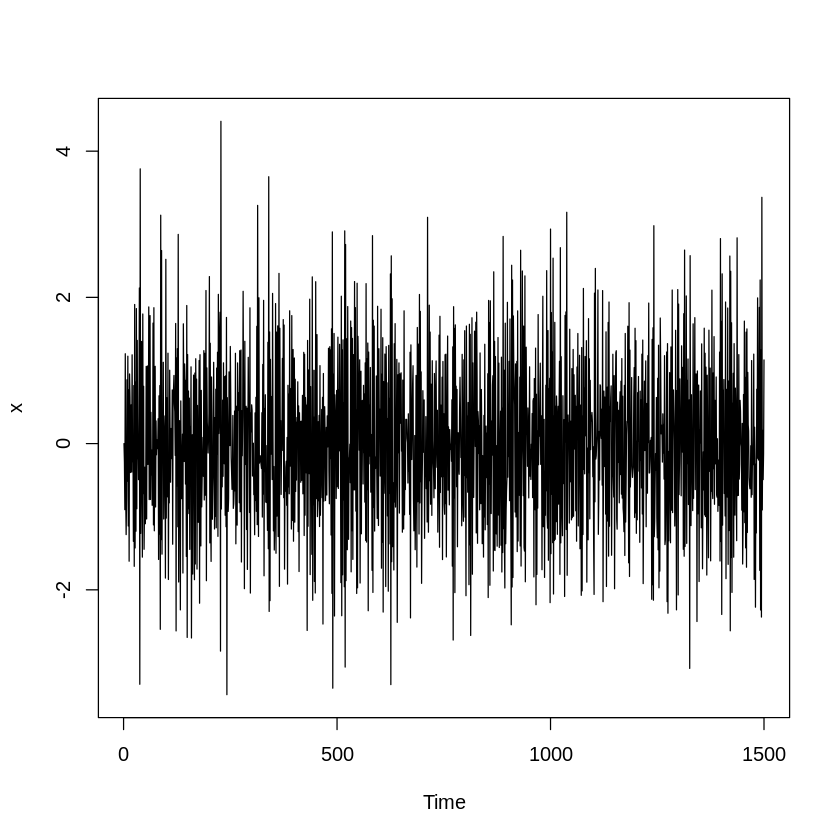

In [21]:
set.seed(38)

n = 1500
x = numeric(n)
phi = -0.6

for (i in 2:n) {
  x[i] = rnorm(1, mean=phi*x[i-1], sd=1.0)
}

plot.ts(x)

The theoretical stationary distribution for this chain is normal with mean 0 and variance $1/(1-\phi^2)$ , which in our example approximately equals 1.562. Let’s look at a histogram of our chain and compare that with the theoretical stationary distribution.

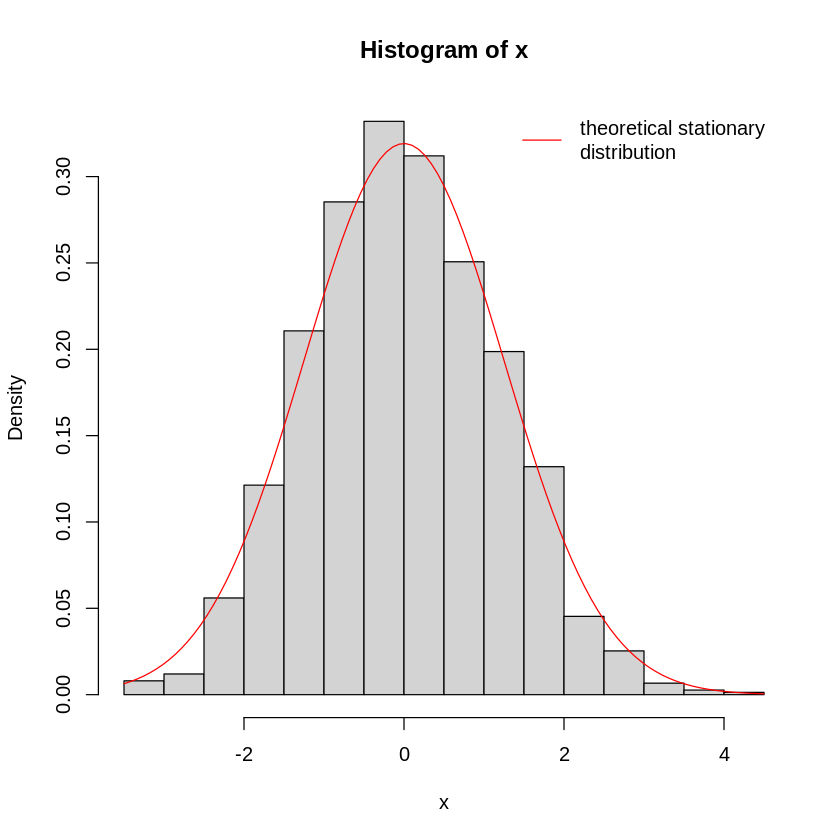

In [22]:
hist(x, freq=FALSE)
curve(dnorm(x, mean=0.0, sd=sqrt(1.0/(1.0-phi^2))), col="red", add=TRUE)
legend("topright", legend="theoretical stationary\ndistribution", col="red", lty=1, bty="n")

It appears that the chain has reached the stationary distribution. Therefore, we could treat this simulation from the chain like a Monte Carlo sample from the stationary distribution, a normal with mean 0 and variance 1.562.

Because most posterior distributions we will look at are continuous, our Monte Carlo simulations with Markov chains will be similar to this example.